DATA CLEANING

In [2]:
import pandas as pd


df = pd.read_csv('train.csv')

#for age column, missing values are filled with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# for embark column, missing values are filled with the mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

#Cabin column has significant no. of misssing values, this column is going to be kept untouched

df.drop_duplicates(inplace=True)

# Verify

print("Missing values after cleaning:")
print(df.isnull().sum())

print(f"\nFinal Shape: {df.shape}")

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Final Shape: (891, 12)


SUMMARY AFTER CLEANING

In [8]:
print("General Info")
print(df.info())


print("\nNumerical Statistics")
print(df.describe().T)


print("\n Categorical Statistics (Unique counts, Frequency)")
print(df.describe(include=['O']).T)


print("\nSurvival Rate")
if 'Survived' in df.columns:
    survival_counts = df['Survived'].value_counts()
    survival_percent = df['Survived'].value_counts(normalize=True) * 100
    print(pd.DataFrame({'Count': survival_counts, 'Percentage (%)': survival_percent}))
else:
    print("Column 'Survived' not found.")


print("\nPassenger Class Distribution")
if 'Pclass' in df.columns:
    pclass_dist = df['Pclass'].value_counts().sort_index()
    print(pclass_dist)


print("\nCorrelation Matrix")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.corr())

General Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Numerical Statistics
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.

OUTLIER DETECTION

In [3]:
import pandas as pd
import numpy as np

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# using Z-score method for outlier detection
# Z = (Value - Mean) / Standard Deviation
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

threshold = 3

outliers_mask = (z_scores.abs() > threshold)

outlier_rows = df[outliers_mask.any(axis=1)]


print(f"Total number of rows with at least one outlier: {len(outlier_rows)}")
print("\nSample of detected outliers:")
print(outlier_rows.head())


print("\nZ-scores for the sample outliers:")
print(z_scores.loc[outlier_rows.index].head())

Total number of rows with at least one outlier: 71

Sample of detected outliers:
    PassengerId  Survived  Pclass  \
13           14         0       3   
16           17         0       3   
25           26         1       3   
27           28         0       1   
50           51         0       3   

                                                 Name     Sex   Age  SibSp  \
13                        Andersson, Mr. Anders Johan    male  39.0      1   
16                               Rice, Master. Eugene    male   2.0      4   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
50                         Panula, Master. Juha Niilo    male   7.0      4   

    Parch   Ticket      Fare        Cabin Embarked  
13      5   347082   31.2750          NaN        S  
16      1   382652   29.1250          NaN        Q  
25      5   347077   31.3875          NaN        S  
27      2    19

EXPLORATORY DATA ANALYSIS

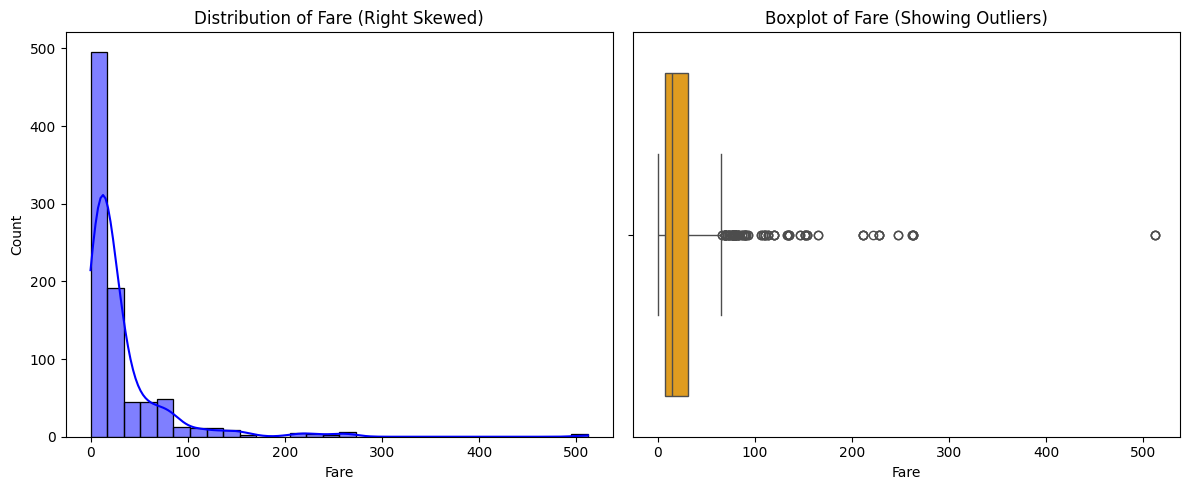

/tmp/ipython-input-3787591591.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')


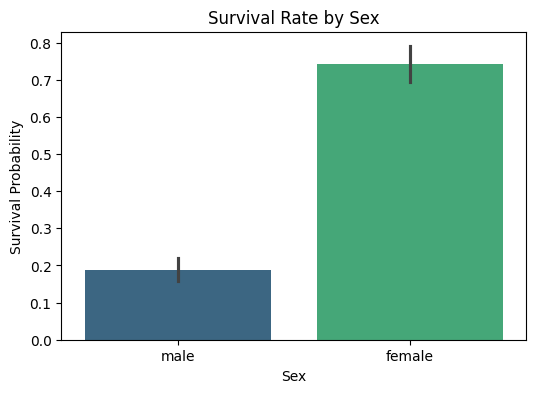

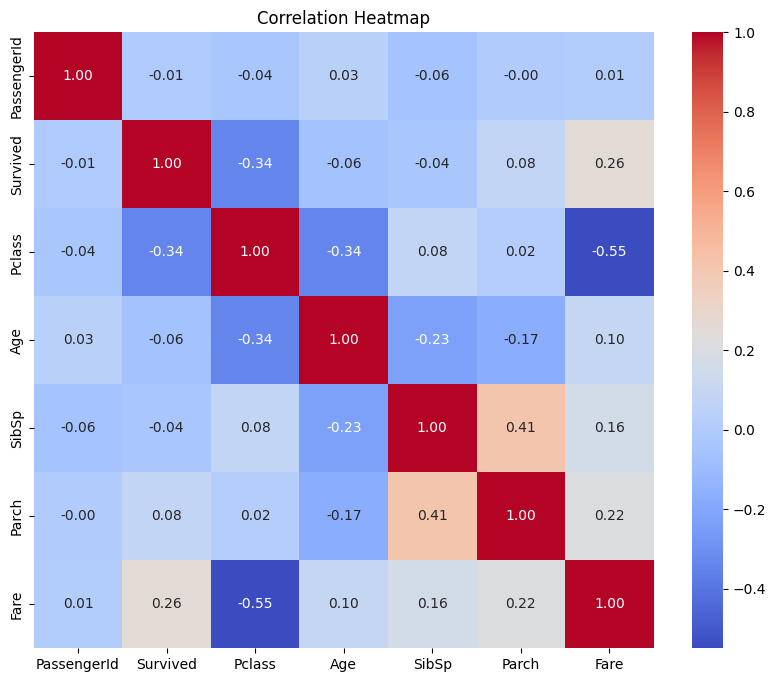

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# DATA VISUALIZATIONS

# A. Distribution of Fare
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare (Right Skewed)')
plt.xlabel('Fare')

# B. Boxplot of Fare to visualize Outliers visually
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='orange')
plt.title('Boxplot of Fare (Showing Outliers)')
plt.tight_layout()
plt.show()

# C. Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Probability')
plt.show()

# D. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()